<a href="https://colab.research.google.com/github/shubhankar77/EDA/blob/main/eda_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

## Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYC Taxi Data.csv')

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
df.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
duplicate=df[df.duplicated()]
duplicate

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


## Preprocessing


Check training data missing values

In [8]:
print(df.isna().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


Check test data missing values

there are no missing values in this datasets.

Let's check pearson's correlation first.

In [9]:
df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,0.020304
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,0.008471
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.026542
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.029204
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.014678
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.020677
trip_duration,0.020304,0.008471,0.026542,-0.029204,0.014678,-0.020677,1.000000


Pearson's correlation analysis does not provide much explanation for this problem.

Now, Let's check outliers.

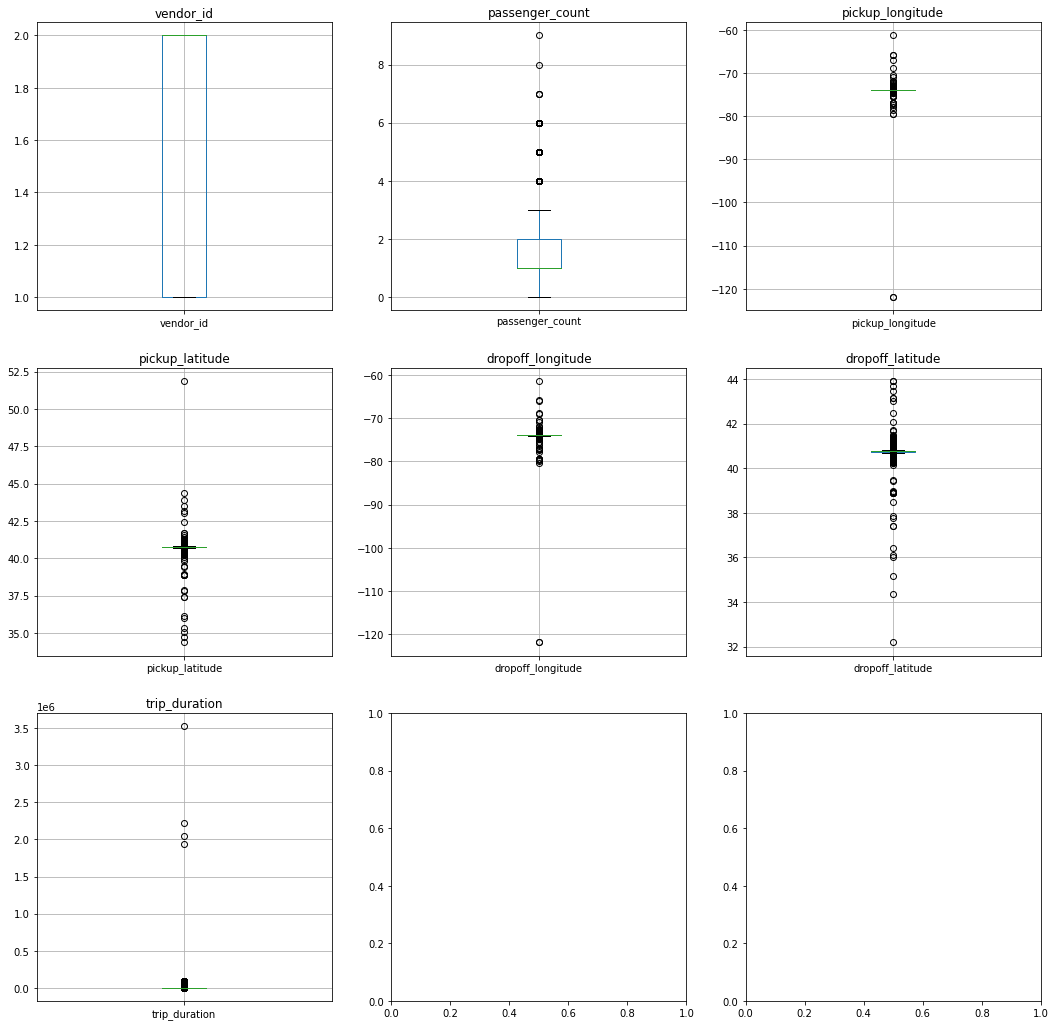

In [10]:
boxplot_columns = df.select_dtypes([int, float]).columns


fig, axex = plt.subplots(3, 3, figsize=(18,18))

for ind, column in enumerate(boxplot_columns):
    plt.subplot(3, 3, ind + 1)
    plt.title(column)
    df.boxplot(column=[column])

plt.show()

We can find that there are definite outlier values in the trip duration.

And I'm not sure if 9 people can take in a taxi. Maybe it's possible if they include babies

Therefore, this cannot be considered a outlier.

Let's take a closer look at the trip duration outliers.

In [11]:
df[df['trip_duration'] > 24 * 60 * 60]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282


There are abnormal values over 24 hours can be checked.

We have more than 1 million data, so we would be safe to delete these data.

In [12]:
df = df[df['trip_duration'] <= 24 * 60 * 60]

In [13]:
EARTH_RADIUS = 6371


def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, [lat1, lng1, lat2, lng2])
    
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h_dist = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h_dist


df['distance'] = haversine_distance(df['pickup_latitude'].values, df['pickup_longitude'].values, 
                                       df['dropoff_latitude'].values, df['dropoff_longitude'].values)


In [14]:
def get_direction(lat1, lng1, lat2, lng2):
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))


df['direction'] = get_direction(df['pickup_latitude'].values, df['pickup_longitude'].values,
                               df['dropoff_latitude'].values, df['dropoff_longitude'].values)


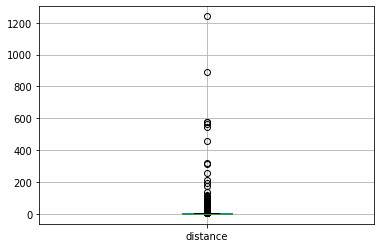

In [15]:
df.boxplot(column='distance')

In [16]:
df[df['distance'] > 400]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,direction
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,792,1240.908677,-175.386243
397526,id0982904,1,2016-04-28 13:32:14,2016-04-28 14:14:09,2,-73.870682,40.773598,-79.817978,38.963852,N,2515,545.853499,-109.700980
910072,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.989914,40.756634,-70.346077,36.398121,N,303,578.842818,145.679904
923793,id1001696,1,2016-02-24 21:02:32,2016-02-24 21:25:57,1,-73.972366,40.758633,-79.553535,43.674000,N,1405,562.235188,-52.952272
974378,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,N,611,891.214103,-45.850237
1013474,id3626673,1,2016-05-05 18:02:50,2016-05-05 18:18:23,1,-73.978912,40.756763,-79.338699,41.427902,N,933,455.241204,-78.811236
1100676,id2644780,1,2016-05-03 16:24:07,2016-05-03 17:18:34,2,-73.991325,40.750023,-79.518616,43.921028,N,3267,574.875442,-50.347488


In [17]:
df = df[df['distance'] <= 400]

In [18]:
df['speed'] = df.distance / (df.trip_duration / 60)

<ipython-input-18-52155f8f6e90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speed'] = df.distance / (df.trip_duration / 60)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458633 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458633 non-null  object 
 1   vendor_id           1458633 non-null  int64  
 2   pickup_datetime     1458633 non-null  object 
 3   dropoff_datetime    1458633 non-null  object 
 4   passenger_count     1458633 non-null  int64  
 5   pickup_longitude    1458633 non-null  float64
 6   pickup_latitude     1458633 non-null  float64
 7   dropoff_longitude   1458633 non-null  float64
 8   dropoff_latitude    1458633 non-null  float64
 9   store_and_fwd_flag  1458633 non-null  object 
 10  trip_duration       1458633 non-null  int64  
 11  distance            1458633 non-null  float64
 12  direction           1458633 non-null  float64
 13  speed               1458633 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 166.9+ MB


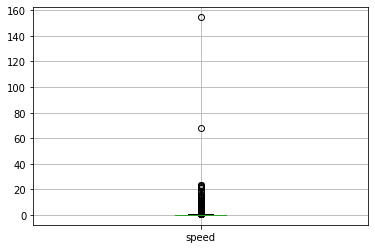

In [20]:
df.boxplot(column='speed')

In [21]:
df[df['speed'] > 60]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,direction,speed
377068,id0116374,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007095,40.717113,-76.963242,38.946033,N,282,320.125775,-127.006088,68.111867
1176337,id3619353,2,2016-02-13 20:28:30,2016-02-13 20:28:37,1,-73.936974,40.764610,-73.789848,40.646858,N,7,18.034405,136.506188,154.580612


In [22]:
df = df[df['speed'] <= 60]

In [23]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'Y' : 1, 'N' : 0})

In [24]:
import datetime as dt
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)

df.loc[:, 'pickup_hour'] = df['pickup_datetime'].dt.hour
df.loc[:, 'pickup_weekday'] = df['pickup_datetime'].dt.day_name()
df.loc[:, 'pickup_date'] = df['pickup_datetime'].dt.day
df.loc[:, 'pickup_month'] = df['pickup_datetime'].dt.month
df.loc[:, 'pickup_day'] = df['pickup_datetime'].dt.dayofweek

In [25]:
def baseFare(x):
    if x in range(16,20):
        Peak_Hour = 2
    elif x in range(20,24):
        Peak_Hour = 1
    else:
        Peak_Hour = 0
    return Peak_Hour

df['Peak_Hour'] = df['pickup_hour'].apply(baseFare)


In [26]:
df['Peak_Hour']

0          2
1          0
2          0
3          2
4          0
          ..
1458639    0
1458640    0
1458641    0
1458642    0
1458643    0
Name: Peak_Hour, Length: 1458631, dtype: int64

In [27]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,direction,speed,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,Peak_Hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,1.498521,99.970196,0.197607,17,Monday,14,3,0,2
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,1.805507,-117.153768,0.163394,0,Sunday,12,6,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,6.385098,-159.680165,0.180370,11,Tuesday,19,1,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,1.485498,-172.737700,0.207762,19,Wednesday,6,4,2,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,1.188588,179.473585,0.163943,13,Saturday,26,3,5,0


In [28]:
y=df["trip_duration"]
x=df.drop(['trip_duration'],axis=1)

In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458631 entries, 0 to 1458643
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458631 non-null  object        
 1   vendor_id           1458631 non-null  int64         
 2   pickup_datetime     1458631 non-null  datetime64[ns]
 3   dropoff_datetime    1458631 non-null  object        
 4   passenger_count     1458631 non-null  int64         
 5   pickup_longitude    1458631 non-null  float64       
 6   pickup_latitude     1458631 non-null  float64       
 7   dropoff_longitude   1458631 non-null  float64       
 8   dropoff_latitude    1458631 non-null  float64       
 9   store_and_fwd_flag  1458631 non-null  int64         
 10  distance            1458631 non-null  float64       
 11  direction           1458631 non-null  float64       
 12  speed               1458631 non-null  float64       
 13  pickup_hour 

In [30]:
x=x.drop(['id','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_latitude','dropoff_longitude','store_and_fwd_flag'],axis=1)

In [31]:
x.head()

,vendor_id,passenger_count,distance,direction,speed,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,Peak_Hour
0,2,1,1.498521,99.970196,0.197607,17,Monday,14,3,0,2
1,1,1,1.805507,-117.153768,0.163394,0,Sunday,12,6,6,0
2,2,1,6.385098,-159.680165,0.180370,11,Tuesday,19,1,1,0
3,2,1,1.485498,-172.737700,0.207762,19,Wednesday,6,4,2,2
4,2,1,1.188588,179.473585,0.163943,13,Saturday,26,3,5,0


In [32]:
x['pickup_weekday'] = x['pickup_weekday'].replace({'Monday' : 1, 'Tuesday' : 2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})

In [33]:
x.head()

,vendor_id,passenger_count,distance,direction,speed,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,Peak_Hour
0,2,1,1.498521,99.970196,0.197607,17,1,14,3,0,2
1,1,1,1.805507,-117.153768,0.163394,0,7,12,6,6,0
2,2,1,6.385098,-159.680165,0.180370,11,2,19,1,1,0
3,2,1,1.485498,-172.737700,0.207762,19,3,6,4,2,2
4,2,1,1.188588,179.473585,0.163943,13,6,26,3,5,0


In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [36]:
x_train.head()

,vendor_id,passenger_count,distance,direction,speed,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,Peak_Hour
689389,1,1,1.394490,169.940066,0.087704,17,6,4,6,5,2
385849,1,1,8.814095,78.434847,0.238434,12,4,30,6,3,0
919778,2,2,2.468334,72.963591,0.185822,16,7,24,4,6,2
22360,1,1,2.489914,19.593669,0.255813,17,1,9,5,0,2
248208,2,1,2.408817,175.209916,0.256257,0,5,15,1,4,0


In [37]:
print(x_train.shape)
print(x_test.shape)

(1166904, 11)
(291727, 11)


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept = True , max_iter = 10000)
clf.fit(x_train,y_train)